In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting style for better visualization
sns.set_theme(style="whitegrid")

In [5]:
# --- Part 1: Loading the datasets ---
# We'll load both CSV files into pandas DataFrames.
# We use `na_values='N/A'` to ensure empty or 'N/A' cells are correctly interpreted as NaN.
try:
    historical_data = pd.read_csv("historical_data.csv", na_values='N/A')
    fear_greed_index = pd.read_csv("fear_greed_index.csv", na_values='N/A')
    print("Datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Error loading files: {e}. Please ensure the files are in the same directory.")
    # Exit if files are not found to prevent further errors
    raise

# Display the first few rows of each DataFrame to understand their structure.
print("\n--- First 5 rows of Historical Trader Data ---")
print(historical_data.head())
print("\n--- First 5 rows of Fear & Greed Index ---")
print(fear_greed_index.head())


Datasets loaded successfully!

--- First 5 rows of Historical Trader Data ---
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL             

In [23]:

# --- Part 2: Data Cleaning and Preparation ---
# We need to ensure the data types are correct and the datasets can be merged.

# Convert the 'Timestamp IST' column in historical_data to a proper datetime object.
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], dayfirst=True)

# Create a new 'date' column in historical_data for merging.
# We first extract the date and then convert it to a datetime object to match the other dataframe.
historical_data['date'] = historical_data['Timestamp IST'].dt.date
historical_data['date'] = pd.to_datetime(historical_data['date'])

# Convert the 'date' column in fear_greed_index to a proper datetime object.
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'])

# Convert 'Closed PnL' to a numeric type. It's often stored as an object.
historical_data['Closed PnL'] = pd.to_numeric(historical_data['Closed PnL'], errors='coerce')

# Drop rows where 'Closed PnL' is NaN after coercion.
historical_data.dropna(subset=['Closed PnL'], inplace=True)

# Display the data types after conversion to confirm.
print("\n--- Data types of Historical Data after cleaning ---")
print(historical_data.info())
print("\n--- Data types of Fear & Greed Index after cleaning ---")
print(fear_greed_index.info())


--- Data types of Historical Data after cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee  

In [25]:
# --- Part 3: Merging the Datasets ---
# We'll merge the two datasets based on their 'date' columns.
# An inner merge ensures we only keep rows where we have both trader data and a sentiment score.
merged_data = pd.merge(historical_data, fear_greed_index, on='date', how='inner', suffixes=('_trade', '_sentiment'))

print("\n--- First 5 rows of Merged Data ---")
print(merged_data.head())
print(f"\nMerged dataset contains {merged_data.shape[0]} rows.")


--- First 5 rows of Merged Data ---
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transac


--- Average Closed PnL by Market Sentiment ---
classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_18796\3134960023.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values, palette="viridis")


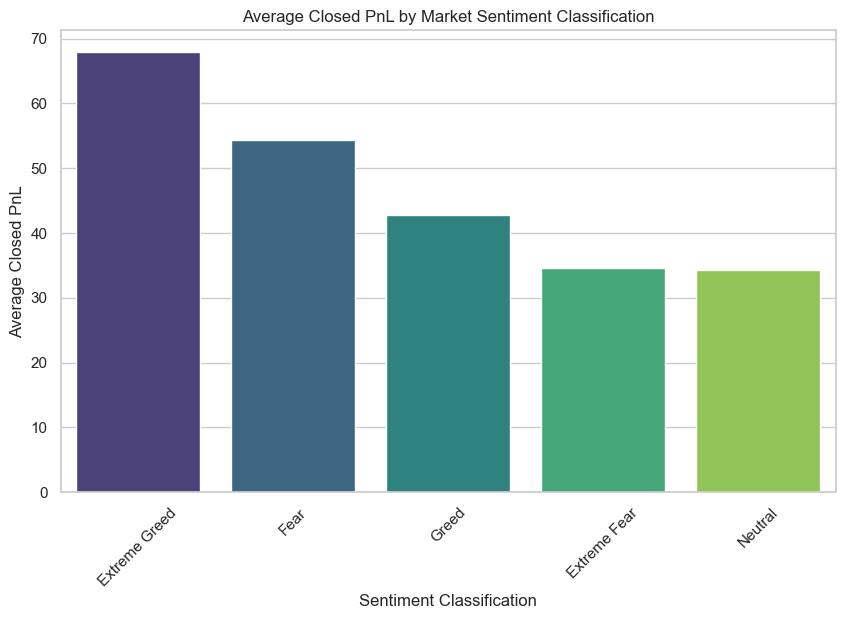

In [31]:
# --- Part 4: Exploratory Data Analysis (EDA) and Visualization ---
# Now we can analyze the relationship between market sentiment and trader performance.

# Calculate the average 'Closed PnL' for each 'classification' (market sentiment).
avg_pnl_by_sentiment = merged_data.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print("\n--- Average Closed PnL by Market Sentiment ---")
print(avg_pnl_by_sentiment)

# Visualize the average PnL by sentiment classification using a bar plot.
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values, palette="viridis")
plt.title('Average Closed PnL by Market Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.savefig('pnl_by_sentiment.png')
plt.show()


--- Average Closed PnL by Sentiment and Trade Side ---
Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Extreme Greed   10.498927  114.584643
Fear            63.927104   45.049641
Greed           25.002302   59.691091
Neutral         29.227429   39.456408


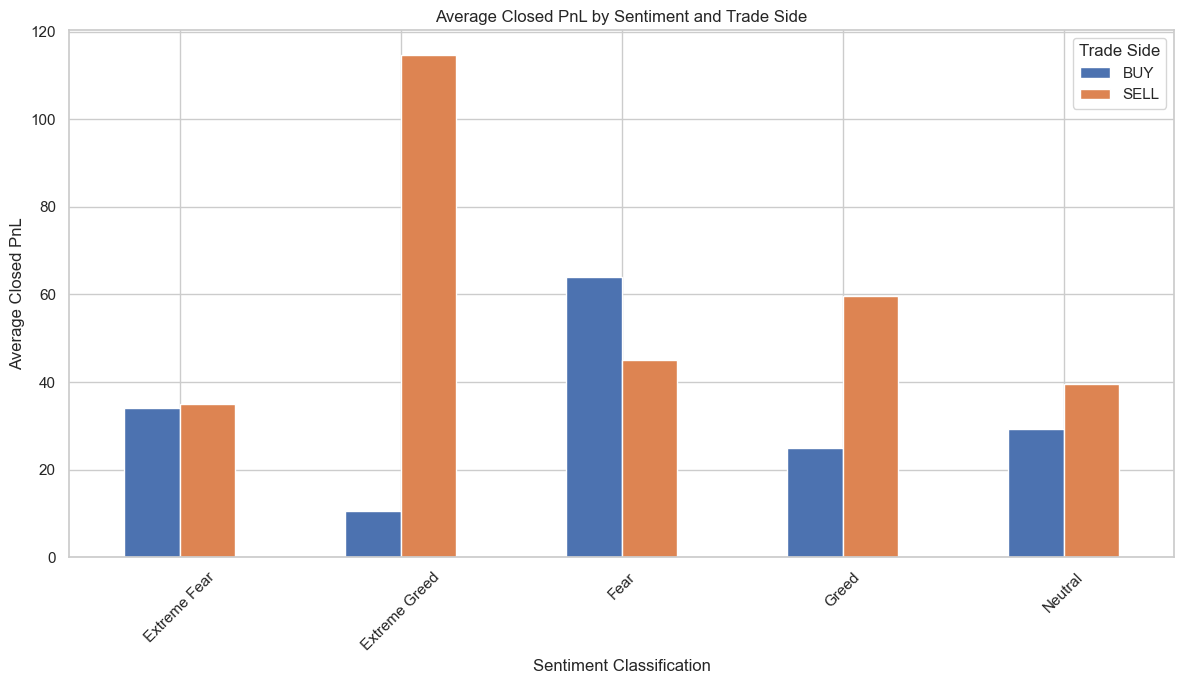

In [33]:
# Further analysis: Let's see if there's a difference in performance for BUY vs SELL trades
# across different sentiment classifications.
avg_pnl_by_side_sentiment = merged_data.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
print("\n--- Average Closed PnL by Sentiment and Trade Side ---")
print(avg_pnl_by_side_sentiment)

# Visualize this with a grouped bar chart.
avg_pnl_by_side_sentiment.plot(kind='bar', figsize=(12, 7))
plt.title('Average Closed PnL by Sentiment and Trade Side')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.legend(title='Trade Side')
plt.tight_layout()
plt.savefig('pnl_by_sentiment_and_trade_side.png')
plt.show()